### Library Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE

### Loading the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
data = pd.read_csv("/content/drive/Othercomputers/My Laptop/Semester-6/CSE-4058/CSE-4058_Project/lending_club_loan_dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

## Preprocessing

### Dropping a column

In [43]:
data = data.drop("last_major_derog_none",axis = 1)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   grade               20000 non-null  object 
 2   annual_inc          20000 non-null  float64
 3   short_emp           20000 non-null  int64  
 4   emp_length_num      20000 non-null  int64  
 5   home_ownership      18509 non-null  object 
 6   dti                 19846 non-null  float64
 7   purpose             20000 non-null  object 
 8   term                20000 non-null  object 
 9   last_delinq_none    20000 non-null  int64  
 10  revol_util          20000 non-null  float64
 11  total_rec_late_fee  20000 non-null  float64
 12  od_ratio            20000 non-null  float64
 13  bad_loan            20000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 2.1+ MB


### Altering categories for term

In [45]:
a = data["term"]
for i in range(len(a)):
    
    if(a[i] == " 36 Months"):
        a[i] = " 36 months"
data["term"] = a
# sns.countplot("term", data = data)

<ipython-input-45-ee2e9c4e029b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[i] = " 36 months"


### Dropping rows with null values

In [46]:
data = data.dropna(axis = 0)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18371 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18371 non-null  int64  
 1   grade               18371 non-null  object 
 2   annual_inc          18371 non-null  float64
 3   short_emp           18371 non-null  int64  
 4   emp_length_num      18371 non-null  int64  
 5   home_ownership      18371 non-null  object 
 6   dti                 18371 non-null  float64
 7   purpose             18371 non-null  object 
 8   term                18371 non-null  object 
 9   last_delinq_none    18371 non-null  int64  
 10  revol_util          18371 non-null  float64
 11  total_rec_late_fee  18371 non-null  float64
 12  od_ratio            18371 non-null  float64
 13  bad_loan            18371 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 2.1+ MB


### Converting categorical data to numerical

In [49]:
unique_values = data['grade'].unique()

# Print the unique values
print(unique_values)

['A' 'D' 'E' 'B' 'G' 'C' 'F']


In [50]:
unique_values = data['home_ownership'].unique()

# Print the unique values
print(unique_values)

['RENT' 'OWN' 'MORTGAGE']


In [54]:
unique_values = data['purpose'].unique()

# Print the unique values
print(unique_values)

['credit_card' 'debt_consolidation' 'medical' 'other' 'home_improvement'
 'small_business' 'major_purchase' 'vacation' 'car' 'house' 'moving'
 'wedding']


In [57]:
unique_values = data['term'].unique()

# Print the unique values
print(unique_values)

[' 36 months' ' 60 months']


In [41]:
label_encoder = LabelEncoder()
data["grade"] = label_encoder.fit_transform(data['grade'])
print(label_encoder.classes_)

data["home_ownership"] = label_encoder.fit_transform(data['home_ownership'])
print(label_encoder.classes_)


data["purpose"] = label_encoder.fit_transform(data['purpose'])
# p=data["pru"]
print(label_encoder.classes_)

data["term"] = label_encoder.fit_transform(data['term'])
print(label_encoder.classes_)


[0 1 2 3 4 5 6]
[0 1 2]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[0 1]


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18371 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18371 non-null  int64  
 1   grade               18371 non-null  int64  
 2   annual_inc          18371 non-null  float64
 3   short_emp           18371 non-null  int64  
 4   emp_length_num      18371 non-null  int64  
 5   home_ownership      18371 non-null  int64  
 6   dti                 18371 non-null  float64
 7   purpose             18371 non-null  int64  
 8   term                18371 non-null  int64  
 9   last_delinq_none    18371 non-null  int64  
 10  revol_util          18371 non-null  float64
 11  total_rec_late_fee  18371 non-null  float64
 12  od_ratio            18371 non-null  float64
 13  bad_loan            18371 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 2.1 MB


In [13]:
data.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,0,100000.0,1,1,2,26.27,1,0,1,43.2,0.0,0.160624,0
1,9604874,0,83000.0,0,4,1,5.39,1,0,0,21.5,0.0,0.810777,0
2,9684700,3,78000.0,0,11,0,18.45,2,1,1,46.3,0.0,0.035147,1
3,9695736,3,37536.0,0,6,0,12.28,6,1,0,10.7,0.0,0.534887,1
4,9795013,3,65000.0,0,11,0,11.26,2,0,0,15.2,0.0,0.166500,0


### Splitting the data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop({"bad_loan","id"}, axis = 1), data["bad_loan"], random_state = 101)


In [15]:
X_train.shape

(13778, 12)

### Normalizing data

In [16]:
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

### Plotting

In [17]:
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'val'], loc = "lower right")
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['train', 'val'], loc = "lower right")
    plt.show()
    
    accuracy = round(history.history['accuracy'][-1],4)
    validation_accuracy = round(history.history['val_accuracy'][-1],4)
    return (accuracy, validation_accuracy)

### Defining a Deep learning model

In [ ]:
model = Sequential()
model.add(Input(shape=(12,) ))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "RMSProp", loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

2023-04-03 22:09:28.286678: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-03 22:09:28.286980: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, Y_train, validation_split = 0.3, batch_size =64, epochs = 40)

Epoch 1/40


2023-03-26 23:57:49.196963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


151/151 [==============================] - ETA: 0s - loss: 0.4866 - accuracy: 0.8023

2023-03-26 23:57:51.229587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


151/151 [==============================] - 3s 13ms/step - loss: 0.4866 - accuracy: 0.8023 - val_loss: 0.4801 - val_accuracy: 0.7966
Epoch 2/40
151/151 [==============================] - 1s 9ms/step - loss: 0.4628 - accuracy: 0.8051 - val_loss: 0.4728 - val_accuracy: 0.7985
Epoch 3/40
151/151 [==============================] - 1s 9ms/step - loss: 0.4570 - accuracy: 0.8062 - val_loss: 0.4673 - val_accuracy: 0.8002
Epoch 4/40
151/151 [==============================] - 1s 9ms/step - loss: 0.4545 - accuracy: 0.8072 - val_loss: 0.4658 - val_accuracy: 0.8007
Epoch 5/40
151/151 [==============================] - 1s 9ms/step - loss: 0.4522 - accuracy: 0.8090 - val_loss: 0.4725 - val_accuracy: 0.8016
Epoch 6/40
151/151 [==============================] - 1s 9ms/step - loss: 0.4519 - accuracy: 0.8082 - val_loss: 0.4641 - val_accuracy: 0.8041
Epoch 7/40
151/151 [==============================] - 1s 9ms/step - loss: 0.4499 - accuracy: 0.8099 - val_loss: 0.4693 - val_accuracy: 0.8019
Epoch 8/40
151/1

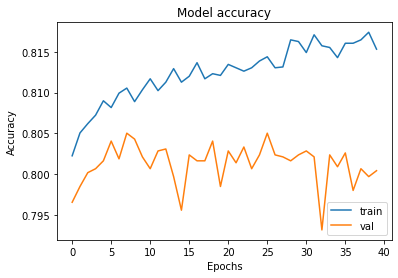

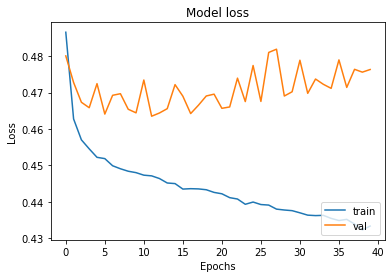

(0.8153, 0.8004)

In [ ]:
plot(hist)

In [ ]:
pred = model.predict(X_test)
for i in range(len(pred)):
    if(pred[i][0] > 0.5):
        pred[i] = 1
    else:
        pred[i] = 0
    
print(classification_report(Y_test,pred))

 98/144 [===================>..........] - ETA: 0s

2023-03-26 23:58:40.596934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      3631
           1       0.51      0.09      0.16       962

    accuracy                           0.79      4593
   macro avg       0.66      0.54      0.52      4593
weighted avg       0.74      0.79      0.73      4593



/Users/praksj/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bad_loan', ylabel='count'>

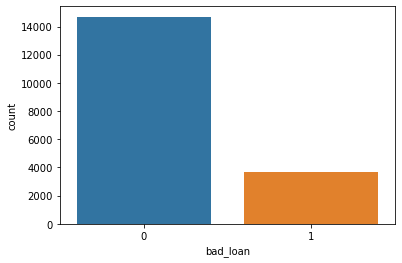

In [ ]:
sns.countplot("bad_loan", data = data)

In [ ]:
print(roc_auc_score(Y_test, model.predict(X_test)))

144/144 [==============================] - 0s 1ms/step
0.7002352118022732


### Modifying learning rate

### Splitting the data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop({"bad_loan","id"}, axis = 1), data["bad_loan"], random_state = 101)


In [19]:
X_train.shape

(13778, 12)

### Normalizing data

In [20]:
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

### Defining a Deep learning model

In [21]:
model = Sequential()
model.add(Input(shape=(12,) ))
model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))

model.add(Dense(128, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = Adam(lr = 0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6656      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 171,009
Trainable params: 171,009
Non-trainable params: 0
_________________________________________________________________


In [22]:
hist = model.fit(X_train, Y_train, validation_split = 0.3, batch_size =256, epochs = 50)

Epoch 1/50
38/38 [==============================] - 7s 90ms/step - loss: 0.5090 - accuracy: 0.7931 - val_loss: 0.4874 - val_accuracy: 0.7963
Epoch 2/50
38/38 [==============================] - 0s 12ms/step - loss: 0.4654 - accuracy: 0.8052 - val_loss: 0.4713 - val_accuracy: 0.7963
Epoch 3/50
38/38 [==============================] - 1s 14ms/step - loss: 0.4574 - accuracy: 0.8052 - val_loss: 0.4743 - val_accuracy: 0.7970
Epoch 4/50
38/38 [==============================] - 0s 13ms/step - loss: 0.4541 - accuracy: 0.8064 - val_loss: 0.4672 - val_accuracy: 0.7973
Epoch 5/50
38/38 [==============================] - 0s 12ms/step - loss: 0.4536 - accuracy: 0.8073 - val_loss: 0.4713 - val_accuracy: 0.7987
Epoch 6/50
38/38 [==============================] - 0s 12ms/step - loss: 0.4520 - accuracy: 0.8059 - val_loss: 0.4652 - val_accuracy: 0.7983
Epoch 7/50
38/38 [==============================] - 0s 11ms/step - loss: 0.4503 - accuracy: 0.8084 - val_loss: 0.4694 - val_accuracy: 0.8000
Epoch 8/50
38

array([[0.33333333, 0.03135173, 0.        , ..., 0.47150664, 0.        ,
        0.36861248],
       [0.83333333, 0.05202564, 0.        , ..., 0.29352069, 0.        ,
        0.70102387],
       [0.16666667, 0.04496626, 0.        , ..., 0.43169399, 0.        ,
        0.46172155],
       ...,
       [0.16666667, 0.02076266, 0.        , ..., 0.27712724, 0.        ,
        0.49475218],
       [0.16666667, 0.05303412, 0.        , ..., 0.3754879 , 0.        ,
        0.35165411],
       [0.        , 0.02580507, 1.        , ..., 0.1303669 , 0.        ,
        0.2552353 ]])

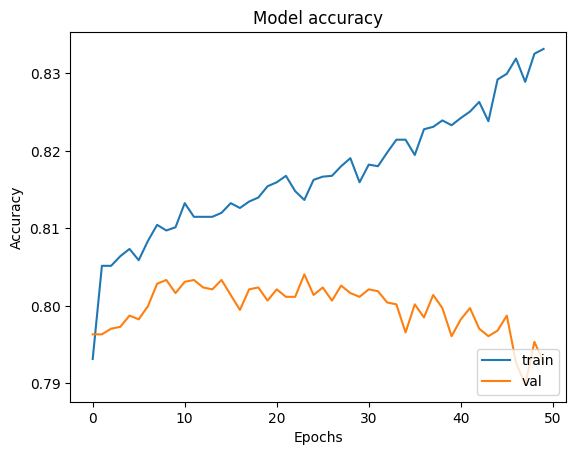

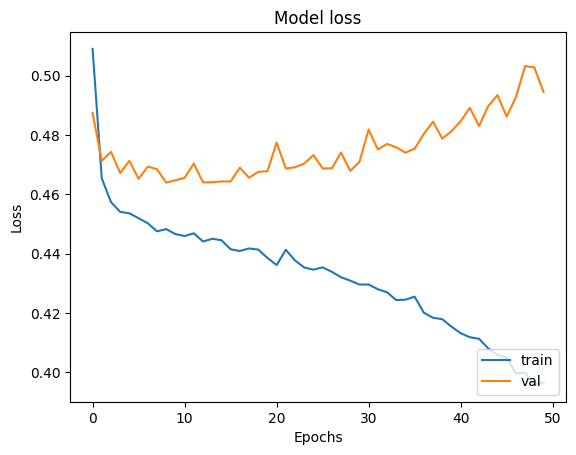

(0.8332, 0.7927)

In [23]:
plot(hist)

In [24]:
pred = model.predict(X_test)
for i in range(len(pred)):
    if(pred[i][0] > 0.5):
        pred[i] = 1
    else:
        pred[i] = 0
    
print(classification_report(Y_test,pred))

144/144 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      3631
           1       0.44      0.10      0.16       962

    accuracy                           0.78      4593
   macro avg       0.62      0.53      0.52      4593
weighted avg       0.72      0.78      0.73      4593



In [25]:
print(roc_auc_score(Y_test, model.predict(X_test)))

144/144 [==============================] - 0s 3ms/step
0.668987770474964


In [35]:
pred = model.predict(X_test)
confidence_probs=1 - pred

144/144 [==============================] - 0s 3ms/step


In [36]:
confidence_probs

array([[0.7136315 ],
       [0.74590623],
       [0.6330566 ],
       ...,
       [0.927515  ],
       [0.9479876 ],
       [0.9228072 ]], dtype=float32)

In [37]:
# for i in range(len(confidence_probs)):
#     if(confidence_probs[i][0] <= 0.5):
#       print("High chance of being a load defaulter")
#     else if (confidence_probs[i][0]>0.5 and )confidence_probs[i][0]<0.7):
#       interest_rate=
X_test

array([[0.83333333, 0.05706806, 0.        , ..., 0.64324746, 0.        ,
        0.10578584],
       [0.33333333, 0.03084749, 0.        , ..., 0.68540203, 0.        ,
        0.08116647],
       [0.5       , 0.00664389, 0.        , ..., 0.54644809, 0.        ,
        0.22676789],
       ...,
       [0.33333333, 0.08732256, 0.        , ..., 0.67915691, 0.        ,
        0.1407762 ],
       [0.16666667, 0.09740739, 0.        , ..., 0.51288056, 0.        ,
        0.73861451],
       [0.16666667, 0.03286446, 0.        , ..., 0.45511319, 0.        ,
        0.23123983]])

In [ ]:

# Load lending data
# df = pd.read_csv('lending_data.csv')

# Define loan terms
loan_amount = 10000
loan_term = 3
print("Input the following values:")

# Define borrower attributes
prob_default = 0.1
income = 50000
credit_grade = 'B'
purpose = 'Debt Consolidation'
homeowner = True
employment_length = 2

# Define interest rate for each credit grade
interest_rates = {'A': 0.05, 'B': 0.1, 'C': 0.15, 'D': 0.2, 'E': 0.25, 'F': 0.3}

# Calculate credit score based on credit grade
credit_score = 750 if credit_grade == 'A' else 650 if credit_grade == 'B' else 550

# Calculate interest rate based on credit score and probability of default
base_interest_rate = interest_rates[credit_grade] + 0.05 * (credit_score - 700) + 0.1 * (prob_default - 0.05)
if homeowner:
    base_interest_rate -= 0.05
interest_rate = min(max(0.05, base_interest_rate), 0.35)

# Calculate monthly payment based on interest rate and loan terms
monthly_interest_rate = interest_rate / 12
num_payments = loan_term * 12
monthly_payment = loan_amount * monthly_interest_rate / (1 - (1 + monthly_interest_rate) ** -num_payments)

# Output interest rate and monthly payment
print(f"Interest rate: {interest_rate:.2%}")
print(f"Monthly payment: ${monthly_payment:.2f}")

In [ ]:
# from sklearn.preprocessing import LabelEncoder



# # Fit and transform the purpose column in your data
# # purpose_encoded = label_encoder.fit_transform(data['purpose'])
# purpose = input("Loan purpose: ")


# # Encode the purpose value input by the user
# user_purpose_encoded = label_encoder.transform([purpose])[0]

# print("Encoded purpose value for user input:", user_purpose_encoded)


In [75]:
import pandas as pd
import numpy as np

# Define interest rates for each credit grade
interest_rates = {'A': 0.05, 'B': 0.1, 'C': 0.15, 'D': 0.2, 'E': 0.25, 'F': 0.3}



# Get borrower attributes from user

print("Please enter the following information:")
annual_inc = float(input("Annual income: "))
short_emp = int(input("Short-term employment (1 for yes, 0 for no): "))
emp_length_num = int(input("Employment length (in years): "))
home_ownership = input("Home ownership status (MORTGAGE, OWN, RENT, or OTHER): ")
dti = float(input("Debt-to-income ratio: "))
purpose = input("Loan purpose: ")
term = input("Loan term (36 or 60 months): ")
last_delinq_none = int(input("No delinquency history (1 for yes, 0 for no): "))
# last_major_derog_none = int(input("No major derogatory events (1 for yes, 0 for no): "))
revol_util = float(input("Revolving line utilization rate (as a decimal): "))
total_rec_late_fee = float(input("Total late fees received to date: "))
od_ratio = float(input("Overdraft ratio: "))

# Calculate credit grade based on borrower attributes
credit_grade = 1 if dti < 10 and revol_util < 0.1 and last_delinq_none == 1 else \
               2 if dti < 15 and revol_util < 0.2 and last_delinq_none == 1 else \
               3 if dti < 20 and revol_util < 0.3 and last_delinq_none == 1 else \
               4 if dti < 25 and revol_util < 0.4 else \
               5 if dti < 30 and revol_util < 0.5 else \
               6
credit_gradel = 'A' if dti < 10 and revol_util < 0.1 and last_delinq_none == 1 else \
'B' if dti < 15 and revol_util < 0.2 and last_delinq_none == 1 else \
'C' if dti < 20 and revol_util < 0.3 and last_delinq_none == 1 else \
'D' if dti < 25 and revol_util < 0.4 else \
'E' if dti < 30 and revol_util < 0.5 else \
'F'
# ['RENT' 'OWN' 'MORTGAGE']

if home_ownership == 'RENT':
  home_ownership=0
elif  home_ownership == 'OWN':
  home_ownership=1
else:
  home_ownership=2
if purpose == 'credit_card':
    purpose = 0
elif purpose == 'debt_consolidation':
    purpose = 1
elif purpose == 'medical':
    purpose = 2
elif purpose == 'other':
    purpose = 3
elif purpose == 'home_improvement':
    purpose = 4
elif purpose == 'small_business':
    purpose = 5
elif purpose == 'major_purchase':
    purpose = 6
elif purpose == 'vacation':
    purpose = 7
elif purpose == 'car':
    purpose = 8
elif purpose == 'house':
    purpose = 9
elif purpose == 'moving':
    purpose = 10
else:
    purpose = 11
if term == ' 36 months':
    term = 0
else:
    term = 1
# # Calculate credit score based on credit grade
credit_score = 800 if credit_grade == 'A' else \
               750 if credit_grade == 'B' else \
               700 if credit_grade == 'C' else \
               650 if credit_grade == 'D' else \
               600 if credit_grade == 'E' else \
               550 if credit_grade == 'F' else \
               500
inputs = np.array([[
    credit_grade,
    annual_inc, 
    short_emp, 
    emp_length_num, 
    home_ownership, 
    dti, 
    purpose, 
    term, 
    last_delinq_none, 
    revol_util, 
    total_rec_late_fee, 
    od_ratio,
    
]])

# inputs =norm.transform(inputs)
# # Calculate probability of default based on borrower attributes
prob_default = model.predict(inputs)

# home_ownership='HOME'
# Calculate interest rate based on credit score and probability of default
if(prob_default>0.85):
  print("The risk is too high")
else:
  base_interest_rate = interest_rates[credit_gradel] + 0.05 * (credit_score - 700) + 0.1 * (prob_default - 0.05)
  if home_ownership == 1:
    base_interest_rate -= 0.05
  interest_rate = min(max(0.05, base_interest_rate), 0.35)
  # Calculate monthly payment based on interest rate and loan terms
  # Define loan terms
  loan_amount = int(input("Enter the loan amount needed: "))
  loan_term = int(input("Enter the loan term required, interest rate will be calculated accoridingly"))
  monthly_interest_rate = interest_rate / 12
  num_payments = loan_term * 12
  monthly_payment = loan_amount * monthly_interest_rate / (1 - (1 + monthly_interest_rate) ** -num_payments)
  # Output interest rate and monthly payment
  print(f"Interest rate: {interest_rate:.2%}")
  print(f"Monthly payment: ${monthly_payment:.2f}")
  print("Probabilty_default:",prob_default)

Please enter the following information:
Annual income: 100000
Short-term employment (1 for yes, 0 for no): 1
Employment length (in years): 1
Home ownership status (MORTGAGE, OWN, RENT, or OTHER): RENT
Debt-to-income ratio: 26.27
Loan purpose: credit_card
Loan term (36 or 60 months): 36 months
No delinquency history (1 for yes, 0 for no): 1
Revolving line utilization rate (as a decimal): 43.2
Total late fees received to date: 0
Overdraft ratio: .160624
1/1 [==============================] - 0s 23ms/step
Enter the loan amount needed: 500000
Enter the loan term required, interest rate will be calculated accoridingly10
Interest rate: 5.00%
Monthly payment: $5303.28
Probabilty_default: [[0.]]


In [ ]:
cre0